In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=6
paper='2110.11330'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring_triangular.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Alright, I need to parse the Hamiltonian equation and answer the questions sequentially to build a Python class for the Hartree-Fock Hamiltonian. Let's break down the problem.

The Hamiltonian is composed of a non-interacting part:
$$H = -\sum_{s}\sum_{\bm{k}} E_{s}(\bm{k}) c_{\bm{k},s}^\dagger c_{\bm{k},s}$$

And two interacting parts - Hartree and Fock:
$H_{\text{Hartree}} = \frac{1}{N}\sum_{s,s'}\sum_{k,k'} U(0) \langle c_{k,s}^\dagger c_{k,s}\rangle c_{k',s'}^\dagger c_{k',s'}$
$H_{\text{Fock}} = -\frac{1}{N}\sum_{s,s'}\sum_{k,q} U(k-q)  \langle c_{k,s}^\dagger c_{k,s'} \rangle c_{q,s'}^\dagger c_{q,s} $

Now let's answer the questions:

### QUESTION 1: Dimension and Basis Order
Let's identify the flavors in the system:

From the Hamiltonian, I see the operators $c_{\bm{k},s}$ and $c_{\bm{k},s}^\dagger$, where $s$ appears to be a flavor index. In the Hartree and Fock terms, we have $s$ and $s'$ indices.

Based on this, it seems l

In [7]:
print(generated_code['thinking'])

Alright, I need to parse the Hamiltonian equation and answer the questions sequentially to build a Python class for the Hartree-Fock Hamiltonian. Let's break down the problem.

The Hamiltonian is composed of a non-interacting part:
$$H = -\sum_{s}\sum_{\bm{k}} E_{s}(\bm{k}) c_{\bm{k},s}^\dagger c_{\bm{k},s}$$

And two interacting parts - Hartree and Fock:
$H_{\text{Hartree}} = \frac{1}{N}\sum_{s,s'}\sum_{k,k'} U(0) \langle c_{k,s}^\dagger c_{k,s}\rangle c_{k',s'}^\dagger c_{k',s'}$
$H_{\text{Fock}} = -\frac{1}{N}\sum_{s,s'}\sum_{k,q} U(k-q)  \langle c_{k,s}^\dagger c_{k,s'} \rangle c_{q,s'}^\dagger c_{q,s} $

Now let's answer the questions:

### QUESTION 1: Dimension and Basis Order
Let's identify the flavors in the system:

From the Hamiltonian, I see the operators $c_{\bm{k},s}$ and $c_{\bm{k},s}^\dagger$, where $s$ appears to be a flavor index. In the Hartree and Fock terms, we have $s$ and $s'$ indices.

Based on this, it seems like the system has a single flavor type, which is the

In [8]:
print(generated_code['text'])

# QUESTION 1: Dimension and Basis Order
Tuple of Flavors (D) = (2,)
Basis Order:
0: spin. Order: up, down

# QUESTION 2: Identifying Interacting Terms
EXP-VAL DEPENDENT TERMS:
- `\langle c_{k,s}^\dagger c_{k,s}\rangle`: Mean of `exp_val[s, s, :]`
- `\langle c_{k,s}^\dagger c_{k,s'} \rangle`: `exp_val[s, s', k]`

TERMS:
- `-\sum_{s}\sum_{\bm{k}} E_{s}(\bm{k}) c_{\bm{k},s}^\dagger c_{\bm{k},s}` -> H[s, s, k], NI
- `\frac{1}{N}\sum_{s,s'}\sum_{k,k'} U(0) \langle c_{k,s}^\dagger c_{k,s}\rangle c_{k',s'}^\dagger c_{k',s'}` -> H[s', s', k'], I
- `-\frac{1}{N}\sum_{s,s'}\sum_{k,q} U(k-q) \langle c_{k,s}^\dagger c_{k,s'} \rangle c_{q,s'}^\dagger c_{q,s}` -> H[s', s, q], I

# QUESTION 3: Complete the HartreeFockHamiltonian Class
```python
import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hamiltonian for a triangular lattice with spin-1/2 particles.
    
    Args:
        N_shell (int): Number of shells in k-space.
        parameters (dict): Di

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hamiltonian for a triangular lattice with spin-1/2 particles.
    
    Args:
        N_shell (int): Number of shells in k-space.
        parameters (dict): Dictionary of model parameters.
        filling_factor (float): Filling factor of the system (default 0.5).
    """
    def __init__(self, N_shell: int, parameters: dict[str, Any]={'t': 1.0, 'U': 1.0, 'U_1': 0.5, 'T': 0.0, 'a': 1.0}, filling_factor: float=0.5):
        self.lattice = 'triangular'  # Triangular lattice
        self.D = (2,)  # Spin up and spin down
        self.basis_order = {'0': 'spin'}
        
        # Occupancy relevant parameters
        self.nu = filling_factor
        self.T = parameters.get('T', 0.0)  # temperature, default to 0
        self.a = parameters.get('a', 1.0)  # Lattice constant
        self.primitive_vectors = get_primitive_vectors_triangle(self.a)
        self.k_space = generate_k_space(self.la

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_2110_11330_6.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Task 1: Check k-space

In [16]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

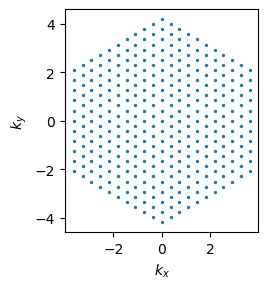

In [17]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [18]:
t0 = "t0" if hasattr(ham,'t0') else 't_0'
t1 = "t1" if hasattr(ham,'t1') else 't_1'
U0 = "U0" if hasattr(ham,'U0') else 'U_0'
U1 = "U1" if hasattr(ham,'U1') else 'U_1'

In [19]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

setattr(ham,t1,1.0)
setattr(ham,t0,0)

In [20]:
h_nonint = ham.generate_non_interacting()

In [21]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

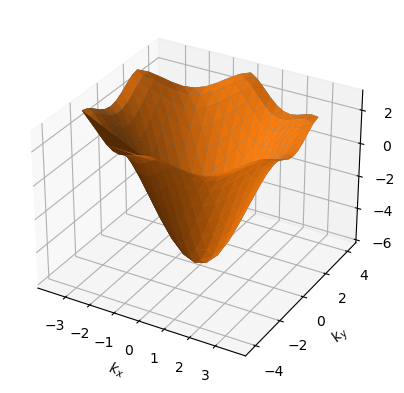

In [22]:
utils_auto.plot_2d_bandstructure(ham,en)

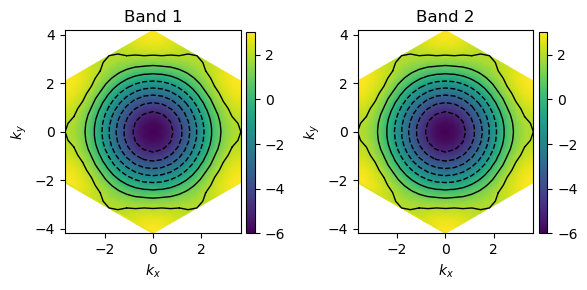

In [23]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [24]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, )
setattr(ham_int,t1,1.0)
setattr(ham_int,t0,0)
setattr(ham_int,U0,1e-5)
setattr(ham_int,U1,0)

In [25]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [26]:
wf_int, en_int, exp_val_int= HF.solve(ham_int,exp_val,99)

Convergence reached at iteration 0


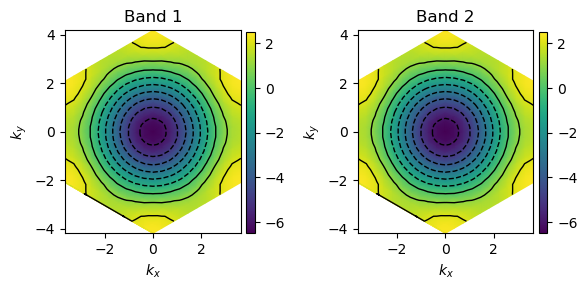

In [27]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit + Large T limit (T=U)i

In [28]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, )
setattr(ham_int,t1,1.0)
setattr(ham_int,t0,0)
setattr(ham_int,U0,1e5)
setattr(ham_int,U1,0)
setattr(ham_int,'T',1e5/1.8)


In [29]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[0,0,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,0.5,0)

In [30]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 2


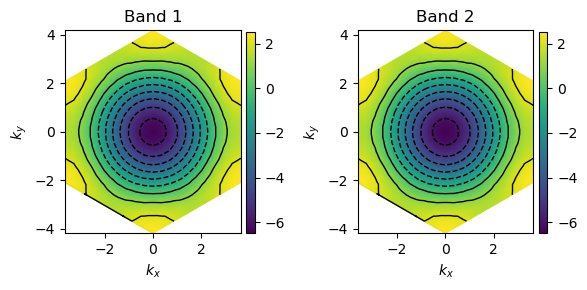

In [31]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [32]:
utils_auto.print_gap(ham_int,exp_val,en_int,1)

Gap is -9.00
U/T is 0.24
mean_U is 0.25


# Auto eval

## Task 1

In [33]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the given image and evaluate it based on the rubric for the problem involving a Hartree-Fock calculation on a triangular lattice.

The image shows a hexagonal pattern of points in momentum space (k-space), with kx on the horizontal axis and ky on the vertical axis. The points range approximately from -4 to 4 on both axes, with the densest concentration of points forming a clear hexagonal shape.

Let's check each bullet point from the rubric:

1. "This image should show momentum space mesh in the first Brillouin zone of the concerned problem."

The first Brillouin zone (BZ) of a triangular lattice is a hexagon in momentum space. Looking at the image, we can see a clear hexagonal pattern of points, which is consistent with the BZ of a triangular lattice. The hexagon appears to be centered at the origin (0,0), and the points are distributed in a regular grid within this hexagonal region.

2. "You need to check the point g

In [34]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [35]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

I need to analyze the band structure plots shown in the image according to the provided rubric. Let me go through the rubric points systematically:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

Looking at the image, I can see that the boundary of the colored region appears to have a hexagonal shape. This is indeed what's expected for a triangular lattice, as the first Brillouin zone of a triangular lattice is a regular hexagon. So this point is correct.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow):
The highest energy regions (shown in yellow) appear to form a hexagonal pattern around the boundary of the Brillouin zone.

2.2 Trace the pattern of energy variation across the zone:
The energy varies from highest (yellow) at the boundaries to lowest (dark purple) at 

In [36]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [37]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper, Gap=0,nu=1/2)
    )


#################### THINKING ####################

Let me analyze this image showing two band plots labeled "Band 1" and "Band 2", according to the given rubric. I'll go through each point methodically.

1. **Brillouin zone shape for triangular lattice**:
   In the image, I can see that the Brillouin zone boundary appears to have a hexagonal shape, which is indeed what we expect for a triangular lattice. The plots show the range of k_x and k_y from approximately -4 to 4, and the contour lines form a hexagonal pattern. This matches a triangular lattice, where the first Brillouin zone is a regular hexagon.

2. **Symmetry of the energy distribution**:
   2.1 The highest energy regions (yellow) appear at the corners of the hexagon.
   2.2 The energy varies gradually from the highest (yellow) at the corners to the lowest (purple) at the center.
   2.3 The energy distribution shows 6-fold rotational symmetry (C6) and mirror symmetries along multiple axes.
   2.4 The symmetry of the energy 

In [38]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [39]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,nu=1/2,U_int='U=1e5 and T=1e5/1.8, so the gap should smear to 0'
    ))


#################### THINKING ####################

I need to analyze the band structure plots in the image and evaluate them according to the rubric. Let me go through each point in the rubric:

1. Identify the shape of the Brillouin zone boundary:
   - Looking at the image, I can see that the plots are bounded by a hexagonal shape, which is indeed the expected Brillouin zone for a triangular lattice.

2. Examine the symmetry of the energy distribution:
   2.1 Highest energy regions (yellow): 
       - The yellow regions appear at the corners of the hexagon (vertices of the Brillouin zone).
   
   2.2 Pattern of energy variation:
       - The energy distribution shows a clear pattern from lowest energy (purple) at the center (Γ point, k=0) to highest energy (yellow) at the corners.
       - The contours form nearly perfect circles/hexagons around the center, indicating isotropic behavior.
   
   2.3 Rotational and mirror symmetries:
       - The plot appears to have 6-fold rotational

In [40]:
answer4=utils_auto.extract_result_content(result4['text'])

In [41]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '6' saved to final_answer.yaml
